<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/Mall_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation Analysis
## Setup dan Import Libraries

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading dan Preprocessing
Pada bagian ini kita akan:
1. Memuat dataset
2. Memeriksa struktur data
3. Menangani missing values jika ada
4. Melakukan encoding untuk variabel kategorikal


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Menampilkan informasi dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
# Melihat beberapa baris pertama
print("\nPreview Dataset:")
print(df.head())


Preview Dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
# Encoding kolom Genre
df['Genre'] = df['Genre'].map({'Female': 0, 'Male': 1})

## 2. Exploratory Data Analysis (EDA)

Pada bagian ini kita akan melakukan:
1. Analisis univariat (distribusi setiap variabel)
2. Analisis bivariat (hubungan antar variabel)
3. Visualisasi data untuk insight

# 2.1 Analisis Univariat

Text(0.5, 1.0, 'Distribusi Umur')

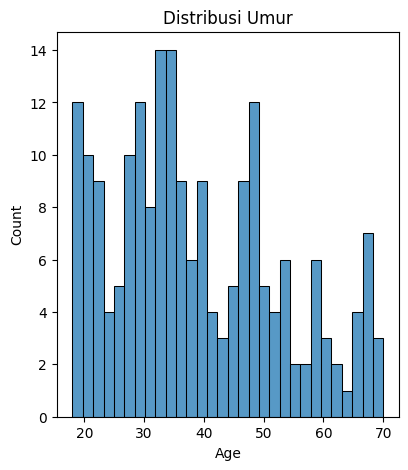

In [9]:
# Distribusi Umur
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Distribusi Umur')

Text(0.5, 1.0, 'Distribusi Pendapatan Tahunan')

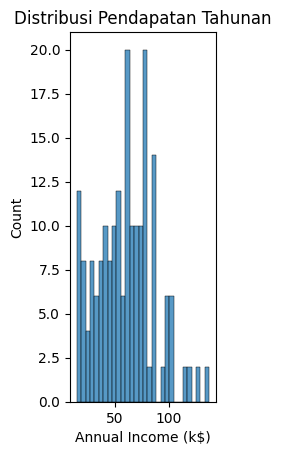

In [13]:
# Distribusi Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', bins=30)
plt.title('Distribusi Pendapatan Tahunan')

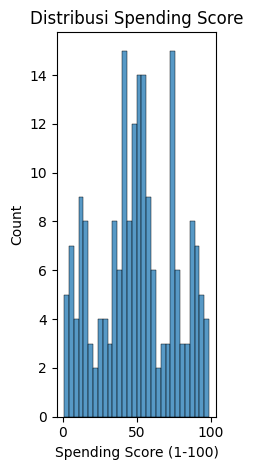

In [14]:
# Distribusi Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', bins=30)
plt.title('Distribusi Spending Score')
plt.tight_layout()
plt.show()

# 2.2 Analisis Bivariat

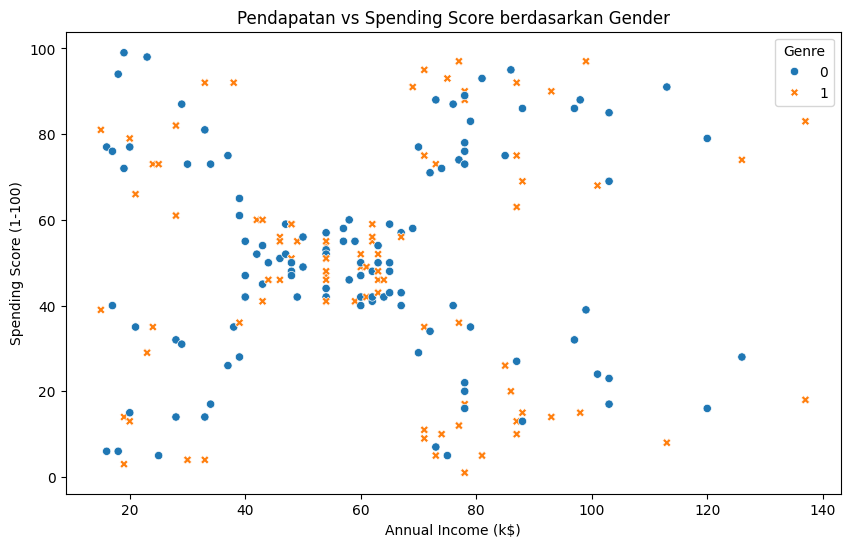

In [15]:
# Scatter plot pendapatan vs spending score dengan gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Genre', style='Genre')
plt.title('Pendapatan vs Spending Score berdasarkan Gender')
plt.show()

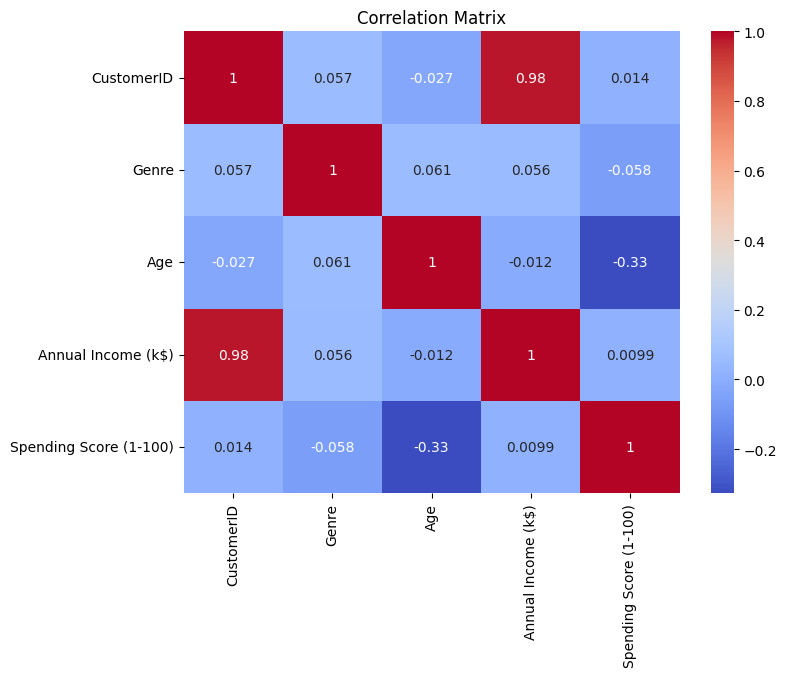

In [16]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

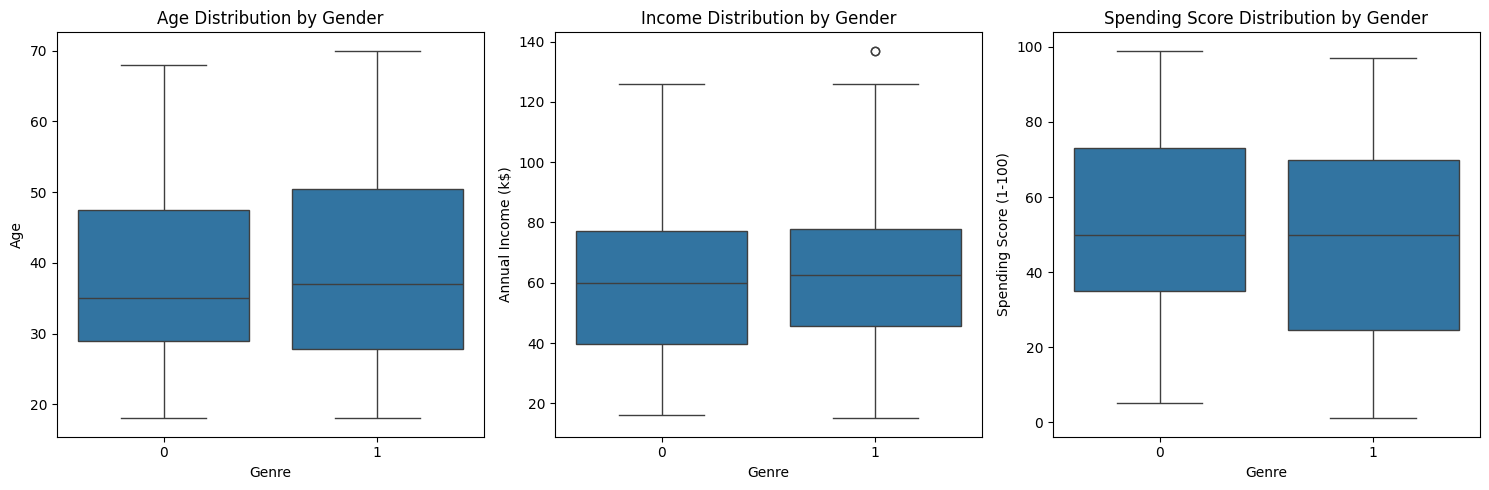

In [17]:
# Box plots untuk analisis kategorik
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Genre', y='Age', data=df)
plt.title('Age Distribution by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df)
plt.title('Income Distribution by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')
plt.tight_layout()
plt.show()

## 3. Clustering Analysis

Pada bagian ini kita akan:
1. Mempersiapkan data untuk clustering
2. Menentukan jumlah cluster optimal
3. Melakukan K-means clustering
4. Visualisasi hasil clustering



# 3.1 Data Preparation

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.2 Menentukan jumlah cluster optimal

In [19]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

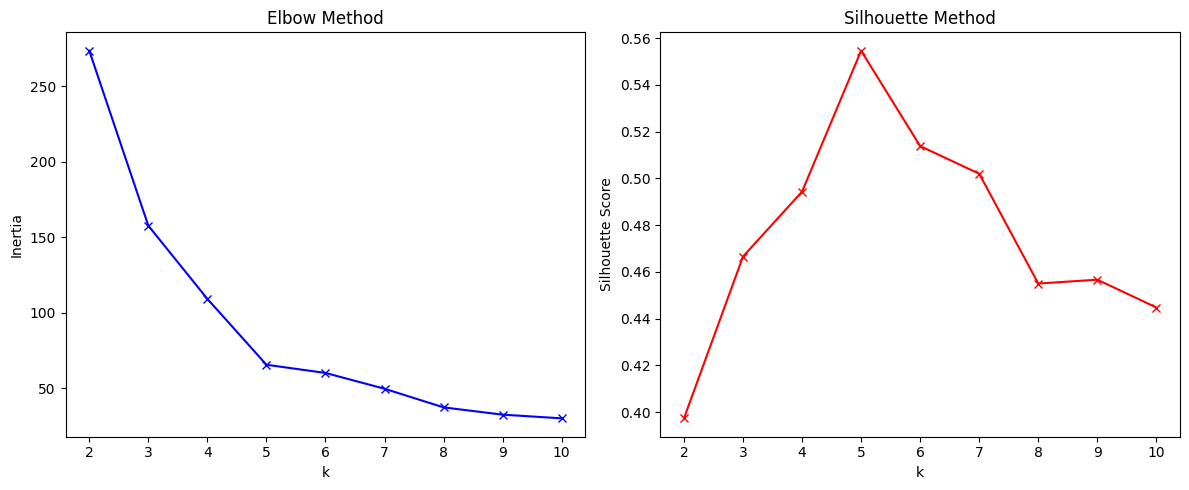

In [21]:
# Plot elbow curve dan silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.tight_layout()
plt.show()

# 3.3 Implementasi K-means dengan k optimal

In [22]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

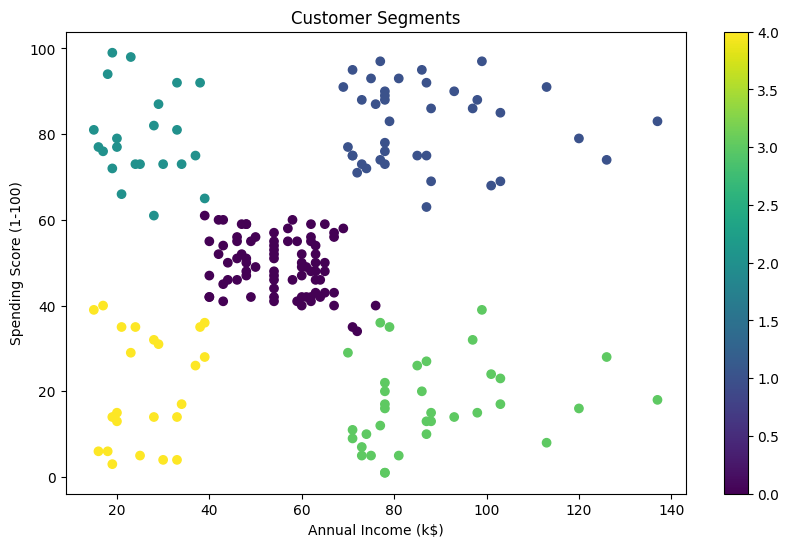

In [23]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

## 4. Cluster Profiling

Pada bagian ini kita akan:
1. Menganalisis karakteristik setiap cluster
2. Membuat visualisasi profil cluster
3. Menginterpretasikan hasil clustering

# 4.1 Analisis Profil Cluster

In [24]:
cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Genre': ['count', 'mean']
}).round(2)

print("Profil Cluster:")
print(cluster_profiles)


Profil Cluster:
           Age        Annual Income (k$)        Spending Score (1-100)         \
          mean    std               mean    std                   mean    std   
Cluster                                                                         
0        42.72  16.45              55.30   8.99                  49.52   6.53   
1        32.69   3.73              86.54  16.31                  82.13   9.36   
2        25.27   5.26              25.73   7.57                  79.36  10.50   
3        41.11  11.34              88.20  16.40                  17.11   9.95   
4        45.22  13.23              26.30   7.89                  20.91  13.02   

        Genre        
        count  mean  
Cluster              
0          81  0.41  
1          39  0.46  
2          22  0.41  
3          35  0.54  
4          23  0.39  


# 4.2 Visualisasi Karakteristik Cluster

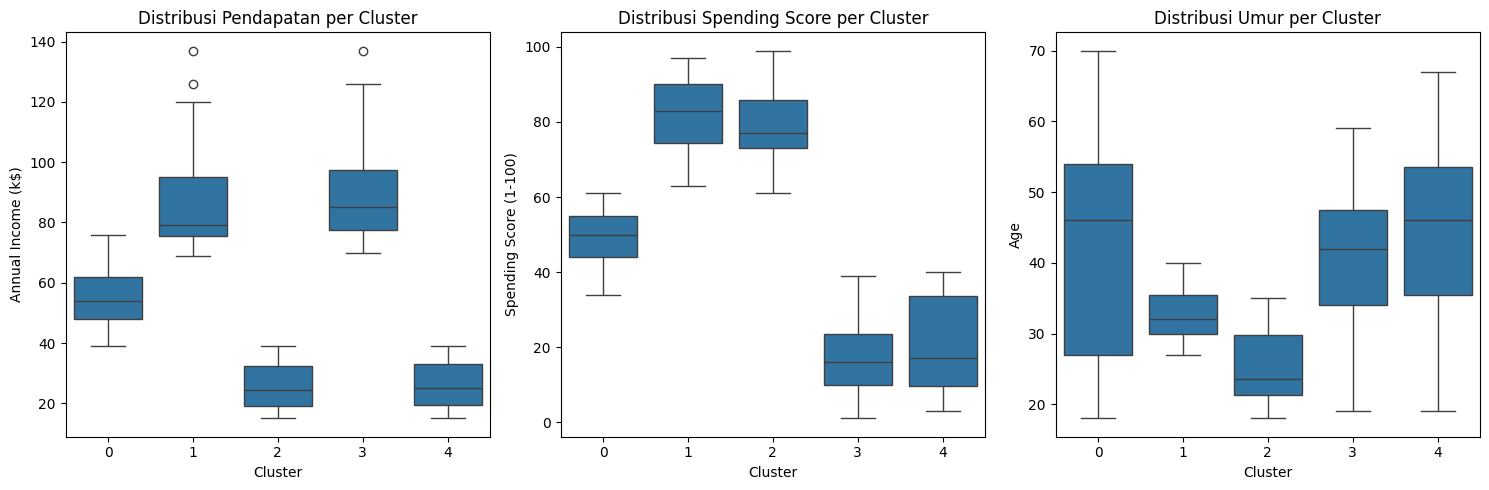

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Distribusi Pendapatan per Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Distribusi Spending Score per Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Distribusi Umur per Cluster')

plt.tight_layout()
plt.show()

## 5. Insights dan Rekomendasi

In [ ]:
## 5. Insights dan Rekomendasi
"""
Berdasarkan analisis yang telah dilakukan, berikut adalah temuan utama:

1. Karakteristik Demografis:
   - Rentang usia pelanggan cukup luas (18-70 tahun)
   - Distribusi pendapatan menunjukkan variasi yang signifikan
   - Ada keseimbangan antara pelanggan pria dan wanita

2. Segmentasi Pelanggan (5 Cluster):
   Cluster 0: "Budget Conscious"
   - Pendapatan menengah
   - Spending score rendah
   - Cenderung berusia lebih tua

   Cluster 1: "Premium Shoppers"
   - Pendapatan tinggi
   - Spending score tinggi
   - Usia rata-rata menengah

   Cluster 2: "Average Consumers"
   - Pendapatan menengah
   - Spending score menengah
   - Distribusi usia merata

   Cluster 3: "Young Spenders"
   - Pendapatan rendah
   - Spending score tinggi
   - Usia rata-rata muda

   Cluster 4: "Conservative High-Income"
   - Pendapatan tinggi
   - Spending score rendah
   - Cenderung berusia lebih tua

3. Rekomendasi:
   - Targetkan promosi premium untuk Cluster 1
   - Kembangkan program loyalitas untuk Cluster 2
   - Buat kampanye khusus untuk Young Spenders (Cluster 3)
   - Tingkatkan engagement untuk Cluster 0 dan 4